# Power transformations
- Power functions are mathematical transformations that follow $𝑋_𝑡 = X^(lambda)$, where lambda can take any value. 
- The __square and cube root transformations__ are special cases where lambda is 1/2 or 1/3 respectively. 
- The challenge is finding the value for lambda parameter. 
- The __Box-Cox transform__ is a generalization of the power transform.
    - It finds the optimal lambda via maximum likelihood.
    - In practice we try different lambdas and visually inspect the variable distribution to the optimum transformation. 
- In general, if the data is right-skewed (observations accumulate toward lower values) – we use lambda <1.
- If the data is left-skewed (more observations around higher values) - we use lambda >1.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import PowerTransformer

In [2]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
def diagnostic_plots(df, variable):

    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

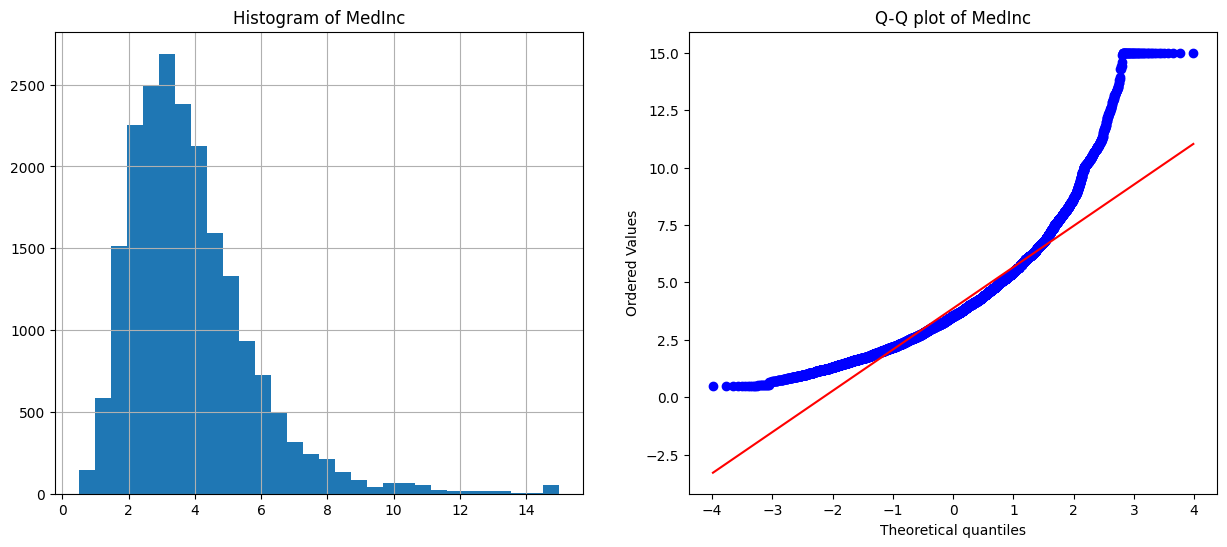

In [4]:
diagnostic_plots(X, "MedInc")

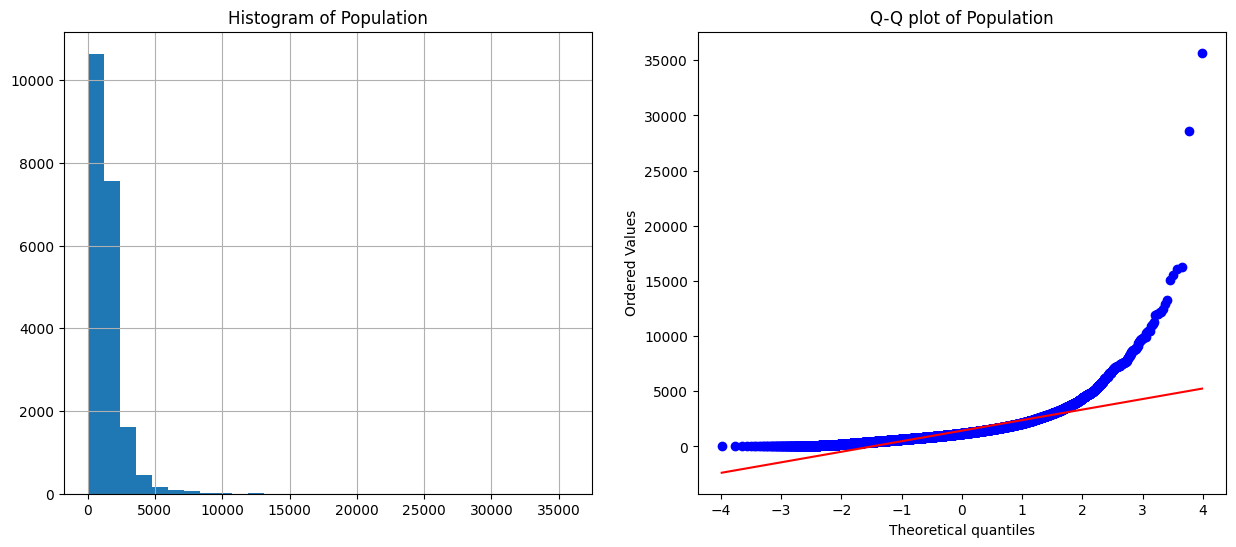

In [5]:
diagnostic_plots(X, "Population")

# Power transformation with NumPy

In [6]:
X_tf = X.copy()

In [7]:
variables = ["MedInc", "Population"]

In [8]:
X_tf[variables] = np.power(X[variables], 0.3)

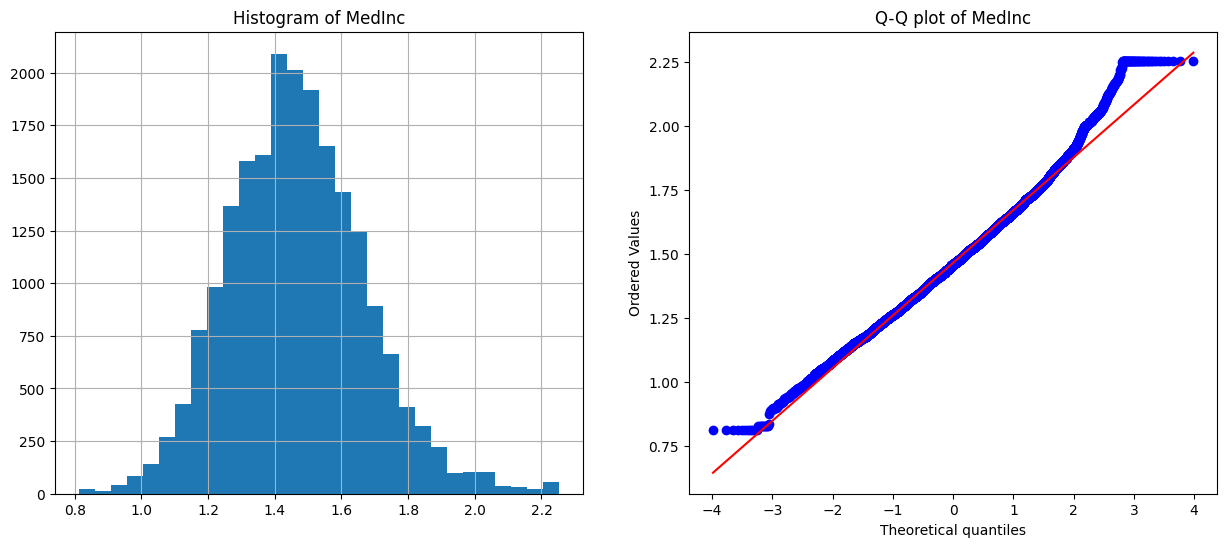

In [9]:
diagnostic_plots(X_tf, "MedInc")

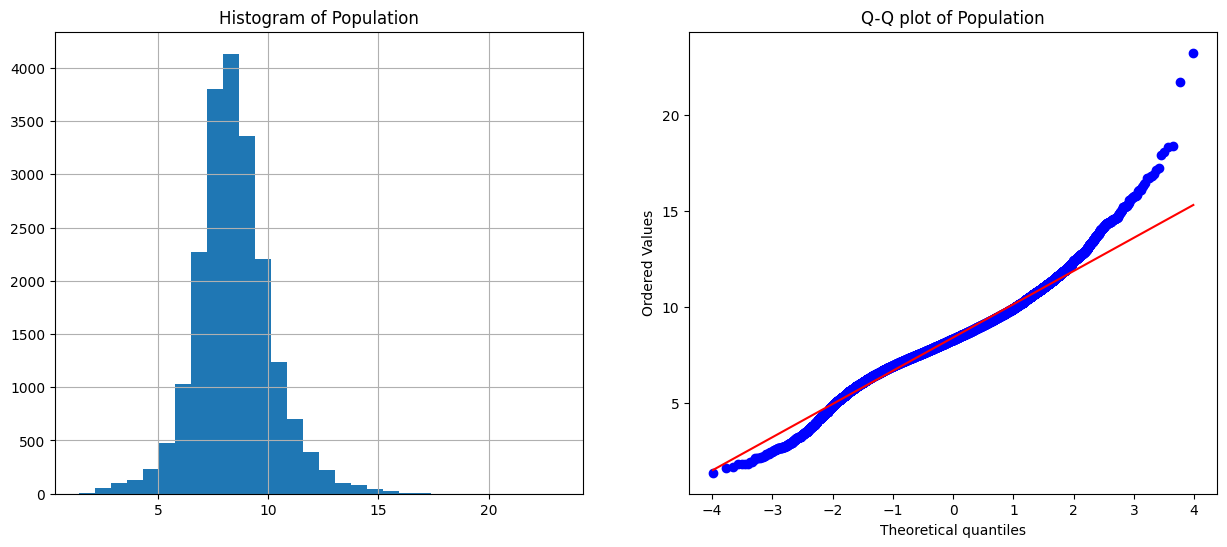

In [10]:
diagnostic_plots(X_tf, "Population")

## Power transformation with Scikit-learn

In [11]:
X_tf = X.copy()

In [12]:
# set up the transformer with a user defined function - start with a 0.3 power transformation
transformer = FunctionTransformer(lambda x: np.power(x, 0.3))

In [13]:
X_tf[variables] = transformer.transform(X[variables])

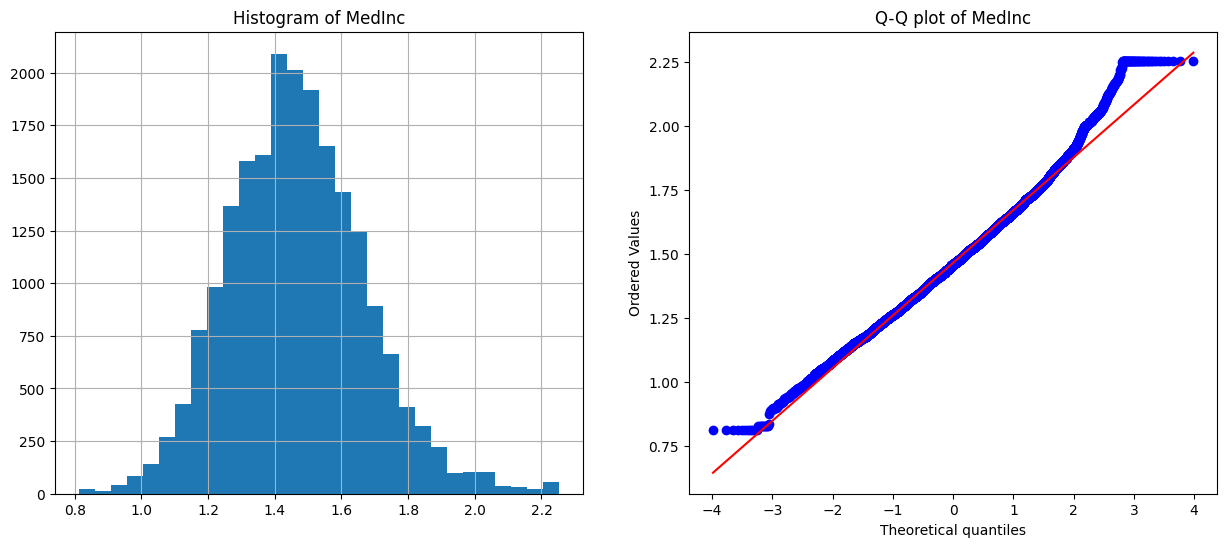

In [14]:
diagnostic_plots(X_tf, "MedInc")

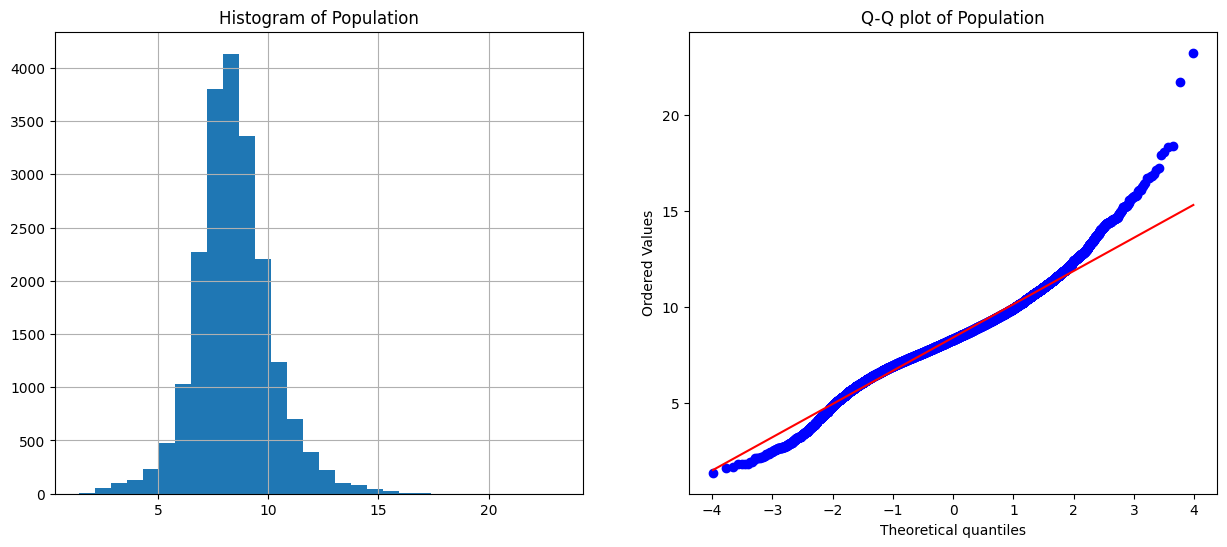

In [15]:
diagnostic_plots(X_tf, "Population")

# Power transformation with Feature-engine

In [16]:
power_t = PowerTransformer(variables=variables, exp=0.3)
power_t.fit(X)

PowerTransformer(exp=0.3, variables=['MedInc', 'Population'])

In [17]:
X_tf = power_t.transform(X)

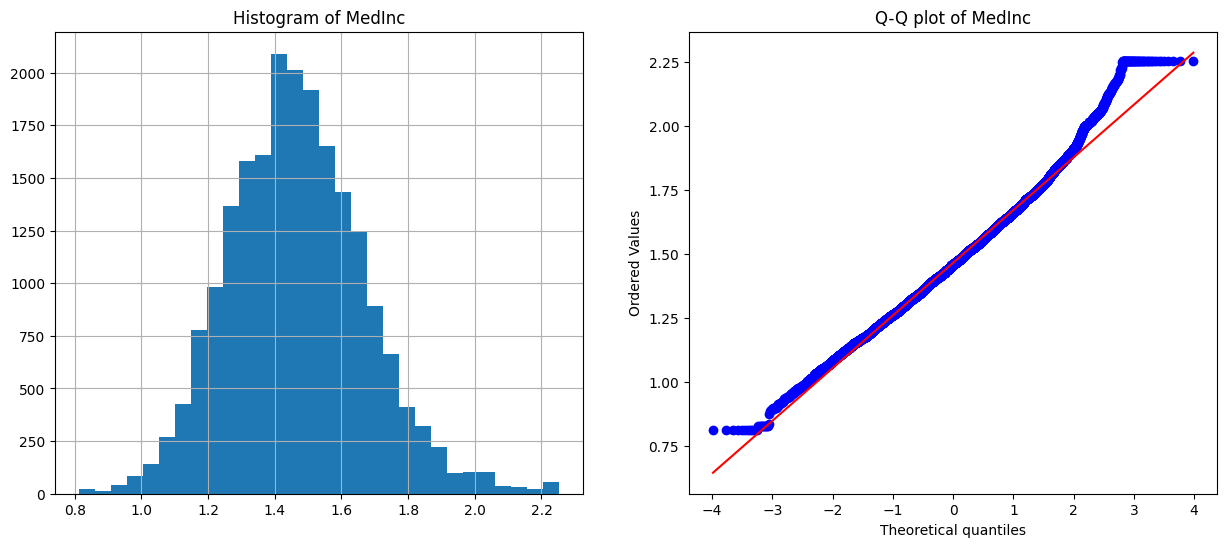

In [18]:
diagnostic_plots(X_tf, "MedInc")

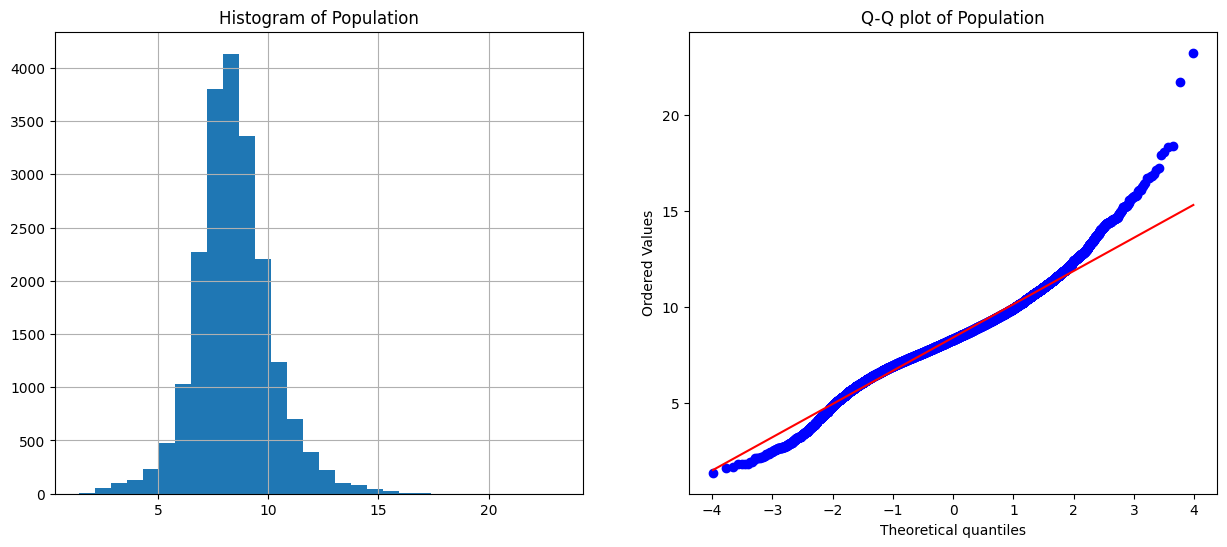

In [19]:
diagnostic_plots(X_tf, "Population")